In [1]:
from nam_classic import nam_excel_hydroapi
from nam_classic import nam_plus_hydro_api
from nested_resevoirs import nested_resevoirs_hydro_api
import data

from matplotlib import pyplot as plt

import jax
import optax

C:\Users\MUNRAS\PycharmProjects\NAM\.venv\Lib\site-packages\jax\_src\numpy\array_methods.py:125: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
C:\Users\MUNRAS\PycharmProjects\NAM\.venv\Lib\site-packages\jax\_src\numpy\array_methods.py:125: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


In [2]:
params = nam_excel_hydroapi.NAMParameters.sample(shape=(5,))
params_nr = nested_resevoirs_hydro_api.NRParameters.sample(shape=(5,))

In [33]:
model = nam_excel_hydroapi.NAM(params=params, optimizer=optax.sgd(learning_rate=0.01))
model2 = nam_plus_hydro_api.NAM(params=params, optimizer=optax.sgd(learning_rate=0.01))
model_nr = nested_resevoirs_hydro_api.NestedResevoirs(params=params_nr, optimizer=optax.adam(learning_rate=1e-1))

In [5]:
final, preds = model.predict(data.observations)

In [12]:
final2, preds2 = model2.predict(data.observations)

In [39]:
final_nr, preds_nr = model_nr.predict(data.observations_m3s)

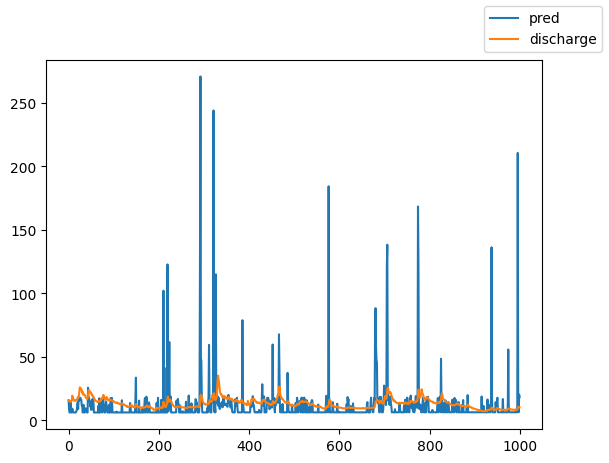

In [55]:
fig, ax = plt.subplots()
ax.plot(preds_nr[:,0][:1000], label="pred")
ax.plot(data.discharge[:1000,0], label="discharge")
fig.legend()

In [17]:
trace = model.optimize(data.observations, data.discharge, steps=10)

Optimizing...:   0%|          | 0/10 [00:00<?, ?it/s]

In [36]:
trace2 = model2.optimize(data.observations, data.discharge, steps=30)

Optimizing...:   0%|          | 0/30 [00:00<?, ?it/s]

In [49]:
trace3 = model_nr.optimize(data.observations_m3s, data.discharge, steps=50)

Optimizing...:   0%|          | 0/50 [00:00<?, ?it/s]

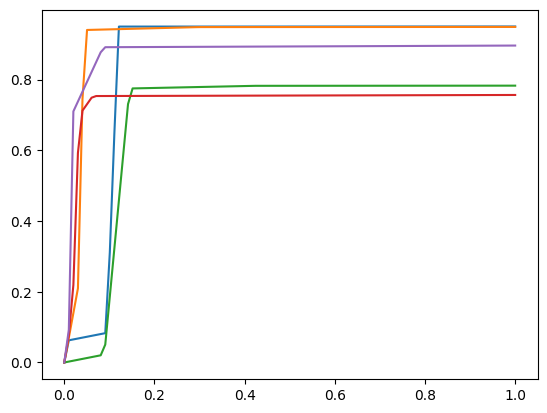

In [56]:
model_nr.params.subsurface_percolation.show()

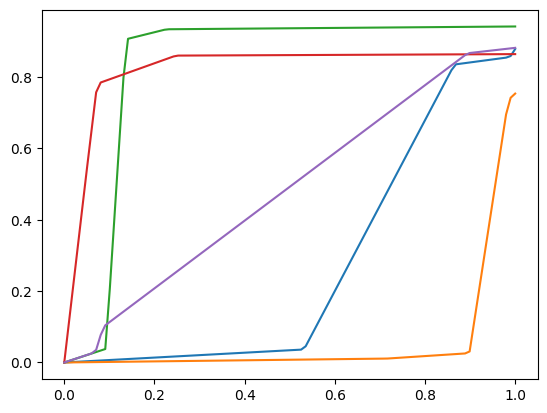

In [57]:
model_nr.params.surface_percolation.show()

In [50]:
[t["loss"] for t in trace3]

[Array([416.95303, 598.5779 ,  90.23616, 433.60193, 329.956  ], dtype=float32),
 Array([414.836  , 594.0613 ,  88.47987, 427.8287 , 325.7392 ], dtype=float32),
 Array([412.45328 , 589.70245 ,  86.873566, 393.2922  , 321.23752 ],      dtype=float32),
 Array([409.80576, 585.56006,  85.40483, 378.17087, 316.3895 ], dtype=float32),
 Array([407.02478 , 581.71674 ,  84.061646, 385.1472  , 311.13327 ],      dtype=float32),
 Array([404.30228, 578.1755 ,  82.83466, 389.12936, 305.40604], dtype=float32),
 Array([401.8532 , 574.92645,  81.71449, 389.8828 , 299.15802], dtype=float32),
 Array([399.84402, 571.88745,  80.69894, 387.46658, 292.36063], dtype=float32),
 Array([398.2952 , 568.91113,  79.78259, 382.1987 , 285.01413], dtype=float32),
 Array([397.04303 , 565.99817 ,  78.961174, 374.53067 , 277.15283 ],      dtype=float32),
 Array([395.8052 , 563.2484 ,  78.22339, 364.9764 , 268.86478], dtype=float32),
 Array([394.336  , 560.7801 ,  77.56843, 354.07907, 260.298  ], dtype=float32),
 Array([39

In [38]:
[t["loss"] for t in trace2]

[Array([50.055565, 65.42713 , 49.535065, 41.086308, 36.60295 ], dtype=float32),
 Array([48.129124, 64.42348 , 49.426533, 38.82971 , 33.963882], dtype=float32),
 Array([46.39153 , 63.43435 , 49.320576, 37.1929  , 31.869022], dtype=float32),
 Array([44.763165, 62.452362, 49.219498, 35.912548, 30.219585], dtype=float32),
 Array([43.20455 , 61.498306, 49.123104, 34.83667 , 28.905111], dtype=float32),
 Array([41.7362  , 60.554035, 49.028687, 33.925888, 27.857048], dtype=float32),
 Array([40.3358  , 59.627293, 48.935402, 33.14117 , 27.001148], dtype=float32),
 Array([39.000477, 58.716694, 48.843292, 32.449738, 26.302925], dtype=float32),
 Array([37.75282 , 57.788334, 48.753506, 31.846756, 25.735884], dtype=float32),
 Array([36.57703 , 56.837406, 48.665443, 31.296968, 25.245796], dtype=float32),
 Array([35.472576, 55.91649 , 48.57856 , 30.789927, 24.80802 ], dtype=float32),
 Array([34.436504, 55.03227 , 48.492504, 30.32368 , 24.410894], dtype=float32),
 Array([33.464287, 54.142128, 48.407516,

In [18]:
[t["loss"] for t in trace]

[Array([50.055565, 65.42713 , 49.535065, 41.086308, 36.60295 ], dtype=float32),
 Array([48.129124, 64.42348 , 49.426533, 38.82971 , 33.963882], dtype=float32),
 Array([46.39153 , 63.43435 , 49.320576, 37.1929  , 31.869022], dtype=float32),
 Array([44.763165, 62.452362, 49.219498, 35.912548, 30.219585], dtype=float32),
 Array([43.20455 , 61.498306, 49.123104, 34.83667 , 28.905111], dtype=float32),
 Array([41.7362  , 60.554035, 49.028687, 33.925888, 27.857048], dtype=float32),
 Array([40.3358  , 59.627293, 48.935402, 33.14117 , 27.001148], dtype=float32),
 Array([39.000477, 58.716694, 48.843292, 32.449738, 26.302925], dtype=float32),
 Array([37.75282 , 57.788334, 48.753506, 31.846756, 25.735884], dtype=float32),
 Array([36.57703 , 56.837406, 48.665443, 31.296968, 25.245796], dtype=float32)]

In [6]:
[t["c_area_"] for t in trace]

[Array([0.37816453, 0.37816453, 0.37816453, 0.37816453, 0.37816453],      dtype=float32, weak_type=True),
 Array([0.37816453, 0.37816453, 0.37816453, 0.37816453, 0.37816453],      dtype=float32),
 Array([0.37816453, 0.37816453, 0.37816453, 0.37816453, 0.37816453],      dtype=float32),
 Array([0.37816453, 0.37816453, 0.37816453, 0.37816453, 0.37816453],      dtype=float32),
 Array([0.37816453, 0.37816453, 0.37816453, 0.37816453, 0.37816453],      dtype=float32),
 Array([0.37816453, 0.37816453, 0.37816453, 0.37816453, 0.37816453],      dtype=float32),
 Array([0.37816453, 0.37816453, 0.37816453, 0.37816453, 0.37816453],      dtype=float32),
 Array([0.37816453, 0.37816453, 0.37816453, 0.37816453, 0.37816453],      dtype=float32),
 Array([0.37816453, 0.37816453, 0.37816453, 0.37816453, 0.37816453],      dtype=float32),
 Array([0.37816453, 0.37816453, 0.37816453, 0.37816453, 0.37816453],      dtype=float32)]

In [8]:
[t["cqof_"] for t in trace]

[Array([ 1.6755481, -1.5003144, -1.2243143, -1.9855766, -1.4382695],      dtype=float32),
 Array([ 1.6566578, -1.5031092, -1.2045052, -1.8466347, -1.3497696],      dtype=float32),
 Array([ 1.6407874, -1.500645 , -1.1850401, -1.7315905, -1.2665551],      dtype=float32),
 Array([ 1.6252478, -1.4938803, -1.1661315, -1.6353   , -1.1916399],      dtype=float32),
 Array([ 1.6112273, -1.4844102, -1.1484404, -1.5493374, -1.1256174],      dtype=float32),
 Array([ 1.5982318, -1.4724096, -1.1309049, -1.4724919, -1.0679004],      dtype=float32),
 Array([ 1.5860302, -1.4589233, -1.1134994, -1.4045212, -1.0174357],      dtype=float32),
 Array([ 1.5747552, -1.4452424, -1.096395 , -1.3424536, -0.9740533],      dtype=float32),
 Array([ 1.5634464, -1.4309572, -1.0797832, -1.2882949, -0.9377562],      dtype=float32),
 Array([ 1.5528097, -1.4159782, -1.0633978, -1.2376422, -0.9069525],      dtype=float32)]

In [36]:
[t["loss"] for t in trace2]

[Array([50.385185, 65.40725 , 50.240772, 40.460167, 36.904495], dtype=float32),
 Array([43.207302, 58.170567, 45.7064  , 35.04067 , 31.275227], dtype=float32),
 Array([37.493774, 51.283028, 41.110443, 30.581244, 27.45695 ], dtype=float32),
 Array([32.857063, 45.057194, 36.595436, 27.024082, 24.676943], dtype=float32),
 Array([29.06436 , 39.663662, 32.412434, 24.24525 , 22.580578], dtype=float32),
 Array([25.955227, 35.2506  , 28.780525, 22.099941, 20.988813], dtype=float32),
 Array([23.395903, 31.747143, 25.801334, 20.478739, 19.757017], dtype=float32),
 Array([21.3063  , 29.014418, 23.45241 , 19.246124, 18.792421], dtype=float32),
 Array([19.591272, 26.889292, 21.646793, 18.29209 , 18.02357 ], dtype=float32),
 Array([18.24042 , 25.19216 , 20.242336, 17.545916, 17.400734], dtype=float32)]

In [17]:
trace[-1]

{'loss': Array([21.613302, 25.608599, 20.12397 , 17.436821, 17.974335], dtype=float32),
 'area_': Array([1055.0057, 1055.007 , 1055.005 , 1055.0071, 1055.0077], dtype=float32),
 'c_area_': Array([1.2667156, 1.1307123, 1.0604523, 1.0072212, 1.0950022], dtype=float32),
 'cqof_': Array([ 1.5721778, -1.3892895, -1.0411782, -1.3014058, -0.923377 ],      dtype=float32),
 'ckif_': Array([-2.9460638, -3.2560902, -3.277405 , -3.044771 , -2.966984 ],      dtype=float32),
 'tof_': Array([ 1.23955   ,  1.2819575 , -0.9689692 , -1.4609165 , -0.19646402],      dtype=float32),
 'tif_': Array([-1.273474 ,  0.5426549,  1.7953852, -1.4793221, -4.8112454],      dtype=float32),
 'tg_': Array([-1.8984805 ,  0.31791335, -2.3878357 , -0.61687857, -2.4113925 ],      dtype=float32),
 'ck1_': Array([1.2533077 , 0.65680355, 1.4940972 , 1.6892759 , 1.2332898 ],      dtype=float32),
 'ck2_': Array([-13.81551, -13.81551, -13.81551, -13.81551, -13.81551], dtype=float32),
 'ckbf_': Array([5.1497245, 5.4278245, 5.4547